In [6]:
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import math
import random

In [65]:
#adding 3 clusters of normal distributions
def clusters(meanx,meany):
    x,y=np.meshgrid(np.arange(-50+meanx,meanx+50,1), np.arange(-50+meany,50+meany,1))
    sigx=2
    sigy=1.5
    corr=0.3
    mux=meanx
    muy=meany
    xx=x.flatten()
    yy=y.flatten()
    zz=[]
    for i in range(xx.size):
        po=((xx[i]-mux)/(sigx*10))*((xx[i]-mux)/(sigx*10))+((yy[i]-muy)/(sigy*10))*((yy[i]-muy)/(sigy*10))
        -2*corr*(xx[i]-mux)*(yy[i]-muy)/((sigx*10)*(sigy*10))
        z=1/(2*3.14*sigx*sigy*np.sqrt(1-corr*corr))*math.exp(-po/(2*(1-corr*corr)))
        zz.append(z)
    zz=np.array(zz)
    z=zz.reshape(x.shape)
    datax=[]
    datay=[]
    for i in range(100):
        datax.append(random.randint(mux-50,mux+50))
        datay.append(random.randint(muy-50,muy+50))
    dataz=[]
    datax=np.array(datax)
    datay=np.array(datay)
    for i in range(datax.size):
        po=((datax[i]-mux)/(sigx*10))*((datax[i]-mux)/(sigx*10))+((datay[i]-muy)/(sigy*10))*((datay[i]-muy)/(sigy*10))
        -2*corr*(datax[i]-mux)*(datay[i]-muy)/((sigx*10)*(sigy*10))
        z=1/(2*3.14*sigx*sigy*np.sqrt(1-corr*corr))*math.exp(-po/(2*(1-corr*corr)))
        dataz.append(z)
    dataz=np.array(dataz)
    res=np.c_[datax,datay,dataz]
    return res
datatest=clusters(50,50)
datatest=np.concatenate((datatest,clusters(-10,-30)))
datatest=np.concatenate((datatest,clusters(130,30)))
datatest=np.concatenate((datatest,clusters(10,30)))
datatest=np.concatenate((datatest,clusters(50,130)))
print(datatest)

[[  5.30000000e+01   7.50000000e+01   1.20936053e-02]
 [  1.20000000e+01   8.10000000e+01   5.91177957e-04]
 [  3.90000000e+01   2.40000000e+01   6.16374255e-03]
 ..., 
 [  9.20000000e+01   1.67000000e+02   2.18280315e-04]
 [  5.50000000e+01   1.69000000e+02   1.35614028e-03]
 [  5.70000000e+01   1.12000000e+02   2.52220739e-02]]


In [66]:
# regular grid covering the domain of the data
xmin=100000
xmax=-100000
ymin=100000
ymax=-100000
for i in datatest[:,0]:
    if xmin>i:
        xmin=i
    if xmax<i:
        xmax=i
for i in datatest[:,1]:
    if ymin>i:
        ymin=i
    if ymax<i:
        ymax=i
X,Y = np.meshgrid(np.arange(xmin-1,xmax+1,1), np.arange(ymin-1,ymax+1,1))
XX = X.flatten()
YY = Y.flatten()
X1,Y1 = np.meshgrid(np.arange(0,xmax-xmin+2,1), np.arange(0,ymax-ymin+2,1))
order=3

In [67]:
if order == 3:
    # best-fit cubic curve
    A = np.c_[np.ones(datatest.shape[0]), datatest[:,:2],
              np.prod(datatest[:,:2], axis=1), datatest[:,:2]**2,datatest[:,:2]**3,
              (datatest[:,0]**2)*datatest[:,1],(datatest[:,1]**2)*datatest[:,0]]
              #np.prod(np.c_(data[:,0]**2,data[:,1]),axis=1)]            
    #const+variable1+variable2+variable3...
    C,_,_,_ = scipy.linalg.lstsq(A, datatest[:,2])
    
    # evaluate it on a grid
    Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2,XX**3,YY**3,XX**2*YY,XX*YY**2], C).reshape(X.shape)
    #(XX**2)*YY

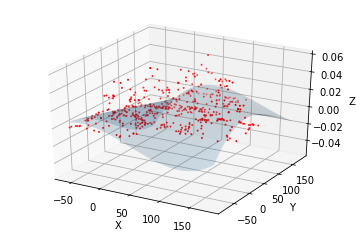

In [68]:
# plot points and fitted surface
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(datatest[:,0], datatest[:,1], datatest[:,2], c='r', s=1)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')
ax.axis('tight')
plt.show()

In [69]:
#making the 3d matrix....
datamat=np.zeros(X.shape)
print(datamat.shape)
print(xmax-xmin)
for i in range(datatest.shape[0]):
        datamat[int(datatest[i][1]-ymin)][int(datatest[i][0]-xmin)]=datatest[i][2]*1000000
datamat
dataframe=pd.DataFrame(datamat)
print(dataframe.head())

(262L, 241L)
239.0
       0    1    2    3    4    5    6    7    8    9   ...   231  232  233  \
0  0.88393  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
1  0.00000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
2  0.00000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
3  0.00000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
4  0.00000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   

   234  235  236  237  238  239  240  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 241 columns]


In [70]:
np.count_nonzero(datamat)

494

In [74]:
p=1
datamat1=datamat
sump=0
sumwie=0
for i in range(datamat.shape[0]):
    for j in range(datamat.shape[1]):
        if datamat[i][j]==0:
            for k in range(datatest.shape[0]):
                div=math.pow(np.sqrt((i+ymin-datatest[k][1])*(i+ymin-datatest[k][1])
                                                      +(j+xmin-datatest[k][0])*(j+xmin-datatest[k][0])),p)
                if div>0:
                    sumwie=sumwie+datatest[k][2]/div
                    sump=sump+1/div
            datamat[i][j]=sumwie/sump
            sumwie=0
            sump=0
print(datamat)    

[[  8.83929985e-01   2.79327546e-04   9.02263063e-04 ...,   1.01747191e-02
    1.01819119e-02   1.01889719e-02]
 [  2.73100297e-04   5.01009968e-04   1.00543998e-03 ...,   1.01804559e-02
    1.01877515e-02   0.00000000e+00]
 [  7.31766734e-04   8.61827857e-04   1.18336555e-03 ...,   1.01861972e-02
    1.01935988e-02   0.00000000e+00]
 ..., 
 [  7.92031938e-03   7.90994073e-03   7.89924677e-03 ...,   9.33505991e-03
    9.34206532e-03   0.00000000e+00]
 [  7.92595756e-03   7.91561003e-03   7.90494803e-03 ...,   9.33174093e-03
    9.33877290e-03   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]


In [85]:
np.count_nonzero(datamat1[1])
datamat1[:,:]=1000*datamat1[:,:]

In [86]:
df=pd.DataFrame(datamat1)

In [87]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,240
0,883.929985,0.279328,0.902263,1.562720,2.141355,2.626214,3.031750,3.375193,3.671628,3.932939,...,10.120712,10.128814,10.136788,10.144634,10.152351,10.159938,10.167394,10.174719,10.181912,10.188972
1,0.273100,0.501010,1.005440,1.556929,2.065109,2.508931,2.889920,3.218018,3.505187,3.761965,...,10.125677,10.133895,10.141983,10.149941,10.157768,10.165463,10.173026,10.180456,10.187751,0.000000
2,0.731767,0.861828,1.183366,1.596361,2.021461,2.414476,2.761543,3.066221,3.338083,3.586410,...,10.130627,10.138963,10.147167,10.155240,10.163180,10.170987,10.178660,10.186197,10.193599,0.000000
3,0.735643,0.862873,1.174574,1.566438,1.960009,2.316999,2.630297,2.907928,3.161173,3.399157,...,10.135553,10.144010,10.152334,10.160525,10.168581,10.176503,10.184288,10.191937,10.199448,0.000000
4,0.284579,0.513164,0.992755,1.472627,1.875604,2.205063,2.483098,2.731113,2.964464,3.192289,...,10.140446,10.149027,10.157474,10.165786,10.173963,10.182003,10.189905,10.197669,10.205293,0.000000


In [88]:
datamat1.shape

(262L, 241L)

In [89]:
np.count_nonzero(datamat)

62641

In [90]:
np.count_nonzero(datamat1)

62641

In [91]:
datatest.shape

(500L, 3L)

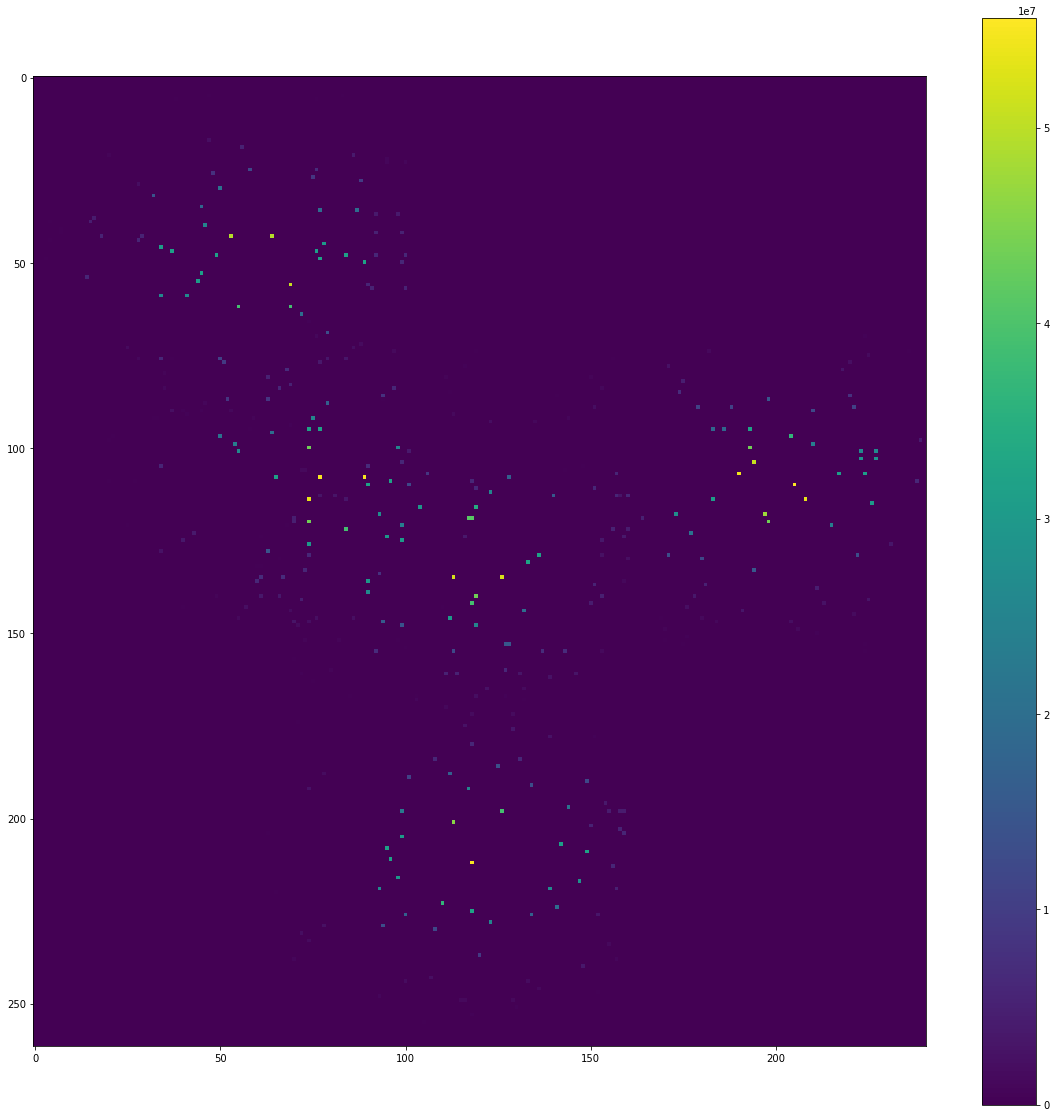

In [92]:
fig = plt.figure(figsize=(20, 20))
plt.imshow(datamat1)
ax.set_aspect('equal')
plt.colorbar(orientation='vertical')
plt.show()

In [84]:
df

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,240
0,0.883930,0.000279,0.000902,0.001563,0.002141,0.002626,0.003032,0.003375,0.003672,0.003933,...,0.010121,0.010129,0.010137,0.010145,0.010152,0.010160,0.010167,0.010175,0.010182,0.010189
1,0.000273,0.000501,0.001005,0.001557,0.002065,0.002509,0.002890,0.003218,0.003505,0.003762,...,0.010126,0.010134,0.010142,0.010150,0.010158,0.010165,0.010173,0.010180,0.010188,0.000000
2,0.000732,0.000862,0.001183,0.001596,0.002021,0.002414,0.002762,0.003066,0.003338,0.003586,...,0.010131,0.010139,0.010147,0.010155,0.010163,0.010171,0.010179,0.010186,0.010194,0.000000
3,0.000736,0.000863,0.001175,0.001566,0.001960,0.002317,0.002630,0.002908,0.003161,0.003399,...,0.010136,0.010144,0.010152,0.010161,0.010169,0.010177,0.010184,0.010192,0.010199,0.000000
4,0.000285,0.000513,0.000993,0.001473,0.001876,0.002205,0.002483,0.002731,0.002964,0.003192,...,0.010140,0.010149,0.010157,0.010166,0.010174,0.010182,0.010190,0.010198,0.010205,0.000000
5,2.819540,0.000297,0.000888,0.001411,0.001791,0.002074,0.002307,0.002523,0.002738,0.002958,...,0.010145,0.010154,0.010163,0.010171,0.010179,0.010187,0.010196,0.010203,0.010211,0.000000
6,0.000299,0.000539,0.001018,0.001425,0.001702,0.001905,0.002086,0.002272,0.002472,0.002689,...,0.010150,0.010159,0.010168,0.010176,0.010185,0.010193,0.010201,0.010209,0.010217,0.000000
7,0.000903,0.001014,0.001245,0.001429,0.001550,0.001664,0.001802,0.001969,0.002164,0.002383,...,0.010155,0.010164,0.010173,0.010181,0.010190,0.010198,0.010207,0.010215,0.010223,0.000000
8,0.001402,0.001356,0.001336,0.001291,0.001268,0.001324,0.001449,0.001617,0.001816,0.002041,...,0.010159,0.010169,0.010178,0.010186,0.010195,0.010204,0.010212,0.010220,0.010228,0.000000
9,0.001673,0.001463,0.001219,0.000965,0.000834,0.000897,0.001052,0.001236,0.001443,0.001669,...,0.010164,0.010173,0.010182,0.010191,0.010200,0.010209,0.010218,0.010226,0.010234,0.000000
